In [ ]:
!wget "https://drive.google.com/u/0/uc?id=1oU4WZnxmOwp2isH6Sv9yAk2C_48EJQhh&export=download" -O Petitions.csv

--2023-10-17 14:06:50--  https://drive.google.com/u/0/uc?id=1oU4WZnxmOwp2isH6Sv9yAk2C_48EJQhh&export=download
Resolving drive.google.com (drive.google.com)... 142.251.111.113, 142.251.111.139, 142.251.111.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.111.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1oU4WZnxmOwp2isH6Sv9yAk2C_48EJQhh&export=download [following]
--2023-10-17 14:06:50--  https://drive.google.com/uc?id=1oU4WZnxmOwp2isH6Sv9yAk2C_48EJQhh&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ne71saks0g2ch8v9hijqh6rurlir9u7a/1697551575000/06789500609444976556/*/1oU4WZnxmOwp2isH6Sv9yAk2C_48EJQhh?e=download&uuid=d8a5c5c2-d043-4a88-bb98-9fe479b804f3 [following]
--2023-10-17 14:07:02--  https://doc-00-90-docs.googleuserconten

In [ ]:
! pip install pymorphy3
import torch
from pymorphy3 import MorphAnalyzer
import re
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('russian')
#stopwords2 = stopwords[:3]+stopwords[4:]
stopwords2 = stopwords
stopwords2 += ['а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'э', 'ю', 'я', 'ъ', 'ь', 'ы']
import pandas as pd
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 74.8 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Препроцессим...

In [ ]:
class preprocessing:

  def __init__(self):
    pass


  def cleaning(self):
    self.object_text = re.sub('[^\s^\w]+', ' ', re.sub('[\r\n]+', ' ', re.sub('[\d,a-zA-Z]', ' ',self.object_text)))

  def tokenize(self):
    self.object_text = word_tokenize(self.object_text)



  def lemmatization(self):
    morph = MorphAnalyzer()
    self.object_text = [morph.normal_forms(w)[0] for w in self.object_text]

  def stopws(self):
    self.object_text = [w for w in self.object_text if w not in self.stopwords]

  def glue(self):
    text = ''
    for i in self.object_text:
      text += ' ' + i
    self.object_text = text

  def exec(self, object_text, stopwords):
    self.object_text = object_text
    self.stopwords = stopwords

    self.cleaning()
    self.tokenize()
    self.lemmatization()
    self.stopws()
    self.glue()
    return self.object_text

  def exec2(self, object_text, stopwords):
    self.object_text = object_text
    self.stopwords = stopwords
    self.cleaning()
    self.tokenize()
    self.lemmatization()
    self.stopws()

    return self.object_text

In [ ]:
data = pd.read_csv("Petitions.csv")
data

,id,public_petition_text,reason_category
0,3168490,снег на дороге,Благоустройство
1,3219678,очистить кабельный киоск от рекламы,Благоустройство
2,2963920,"Просим убрать все деревья и кустарники, которы...",Благоустройство
3,3374910,Неудовлетворительное состояние парадной - надп...,Содержание МКД
4,3336285,Граффити,Благоустройство
...,...,...,...
59884,3128111,прошу закрасить граффити,Благоустройство
59885,3276713,Прошу вас отремонтировать пешеходную дорожку,Благоустройство
59886,3274663,Необходимо демонтировать незаконную рекламную ...,Незаконная информационная и (или) рекламная ко...
59887,3359308,Очень гремит на ветру металлическая часть окна...,Кровля


он сдался  
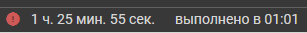

In [ ]:
# здесь можно пойти пить чай
b = preprocessing()
data2 = data[:5000]
data2['petition'] = [b.exec(data2.iloc[i, 1], stopwords2) for i in range(len(data2))]

<ipython-input-5-87fe52ab52e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['petition'] = [b.exec(data2.iloc[i, 1], stopwords2) for i in range(len(data2))]


In [ ]:
data2

,id,public_petition_text,reason_category,petition
0,3168490,снег на дороге,Благоустройство,снег дорога
1,3219678,очистить кабельный киоск от рекламы,Благоустройство,очистить кабельный киоск реклама
2,2963920,"Просим убрать все деревья и кустарники, которы...",Благоустройство,просить убрать всё дерево кустарник который в...
3,3374910,Неудовлетворительное состояние парадной - надп...,Содержание МКД,неудовлетворительный состояние парадный надпи...
4,3336285,Граффити,Благоустройство,граффити
...,...,...,...,...
4995,2980163,Неудовлетворительное состояние подъезда (Первы...,Содержание МКД,неудовлетворительный состояние подъезд первый...
4996,2977112,Автомобиль в неудовлетворительном техническом ...,Благоустройство,автомобиль неудовлетворительный технический с...
4997,3115059,Надписи на стекле двери на 14 этаже в 3 подъезде.,Содержание МКД,надпись стекло дверь этаж подъезд
4998,3087778,объявления,Благоустройство,объявление


In [ ]:
#data2.to_csv('10kpreprocessedpets.csv', index = False)
from google.colab import files


In [ ]:
#files.download('/content/10kpreprocessedpets.csv')

# Составляем словарь

In [ ]:
vocab = {}
text = ""
for i in range(len(data2['petition'])):
  text += ' ' + data2['petition'][i]
text = text[1:-1]

tokenized = word_tokenize(text)

for i  in range(len(tokenized)):
  if tokenized[i] not in vocab.values():
    vocab[tokenized[i]] = i

counter = 1
for key in vocab.keys():
  vocab[key] = counter
  counter += 1

vocab2 = {v:k for k, v in vocab.items()}


В изначальном тексте 112580 слов, в вокабуляре - 8626 🤯

In [ ]:
print(len(tokenized))
print(vocab2)
vocab = vocab2

48700
{1: 'снег', 2: 'дорога', 3: 'очистить', 4: 'кабельный', 5: 'киоск', 6: 'реклама', 7: 'просить', 8: 'убрать', 9: 'всё', 10: 'дерево', 11: 'кустарник', 12: 'который', 13: 'выйти', 14: 'предел', 15: 'газон', 16: 'пешеходный', 17: 'зона', 18: 'начинать', 19: 'подъезд', 20: 'фасад', 21: 'дом', 22: 'сторона', 23: 'ул', 24: 'наличный', 25: 'неудовлетворительный', 26: 'состояние', 27: 'парадный', 28: 'надпись', 29: 'дверь', 30: 'этаж', 31: 'граффити', 32: 'необходимо', 33: 'проверить', 34: 'законность', 35: 'установка', 36: 'вывеска', 37: 'мкд', 38: 'адрес', 39: 'проспект', 40: 'непокорённый', 41: 'случай', 42: 'установить', 43: 'незаконно', 44: 'её', 45: 'демонтировать', 46: 'уборка', 47: 'производиться', 48: 'лестница', 49: 'очень', 50: 'грязно', 51: 'весь', 52: 'вплоть', 53: 'го', 54: 'звонок', 55: 'жкс', 56: 'дать', 57: 'результат', 58: 'мусор', 59: 'отсутствовать', 60: 'освещение', 61: 'лестничный', 62: 'площадка', 63: 'делать', 64: 'благоустройство', 65: 'никто', 66: 'убирать', 67:

# Матрица контекстных эмбеддингов

In [ ]:
mainmatrix = torch.zeros(len(vocab)+1, len(vocab)+1, requires_grad = False)

for i in data2.iloc[:, 3]: # итерируемся по обработанным объектам датафрейма
  subvocab = {}
  matrix = torch.zeros(len(vocab)+1, len(vocab)+1, requires_grad = False)

  # здесь считаем количество слов поодиночке в объекте
  for key, value in vocab.items():
    if value in i:
        matrix[0][key] += 1 # встречаем слово из словаря в объекте-> +1 к [0][индекс этого слова в словаре]
        matrix[key][0] += 1 # и +1 к [индекс этого слова в словаре][0]
        subvocab[key] = value # добавляем в подсловарь встреченное слово

  # здесь докидываем ВАЛУЕ на пересечениях всем кто был с нами в этом объекте!!
  for key, value in subvocab.items():
    for key2, value2 in subvocab.items():
      matrix[key][key2] += matrix[0][key]
  for i in range(len(matrix)):
    matrix[i][i] = 0
  # сливаем все данные по объекту в босс матрицу
  mainmatrix += matrix

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
#np.savetxt('embeddings.tsv', pca.fit_transform(mainmatrix), delimiter='\t')
#vectorized_vocab = torch.from_numpy(pca.fit_transform(mainmatrix)).type(torch.long)

<Axes: >

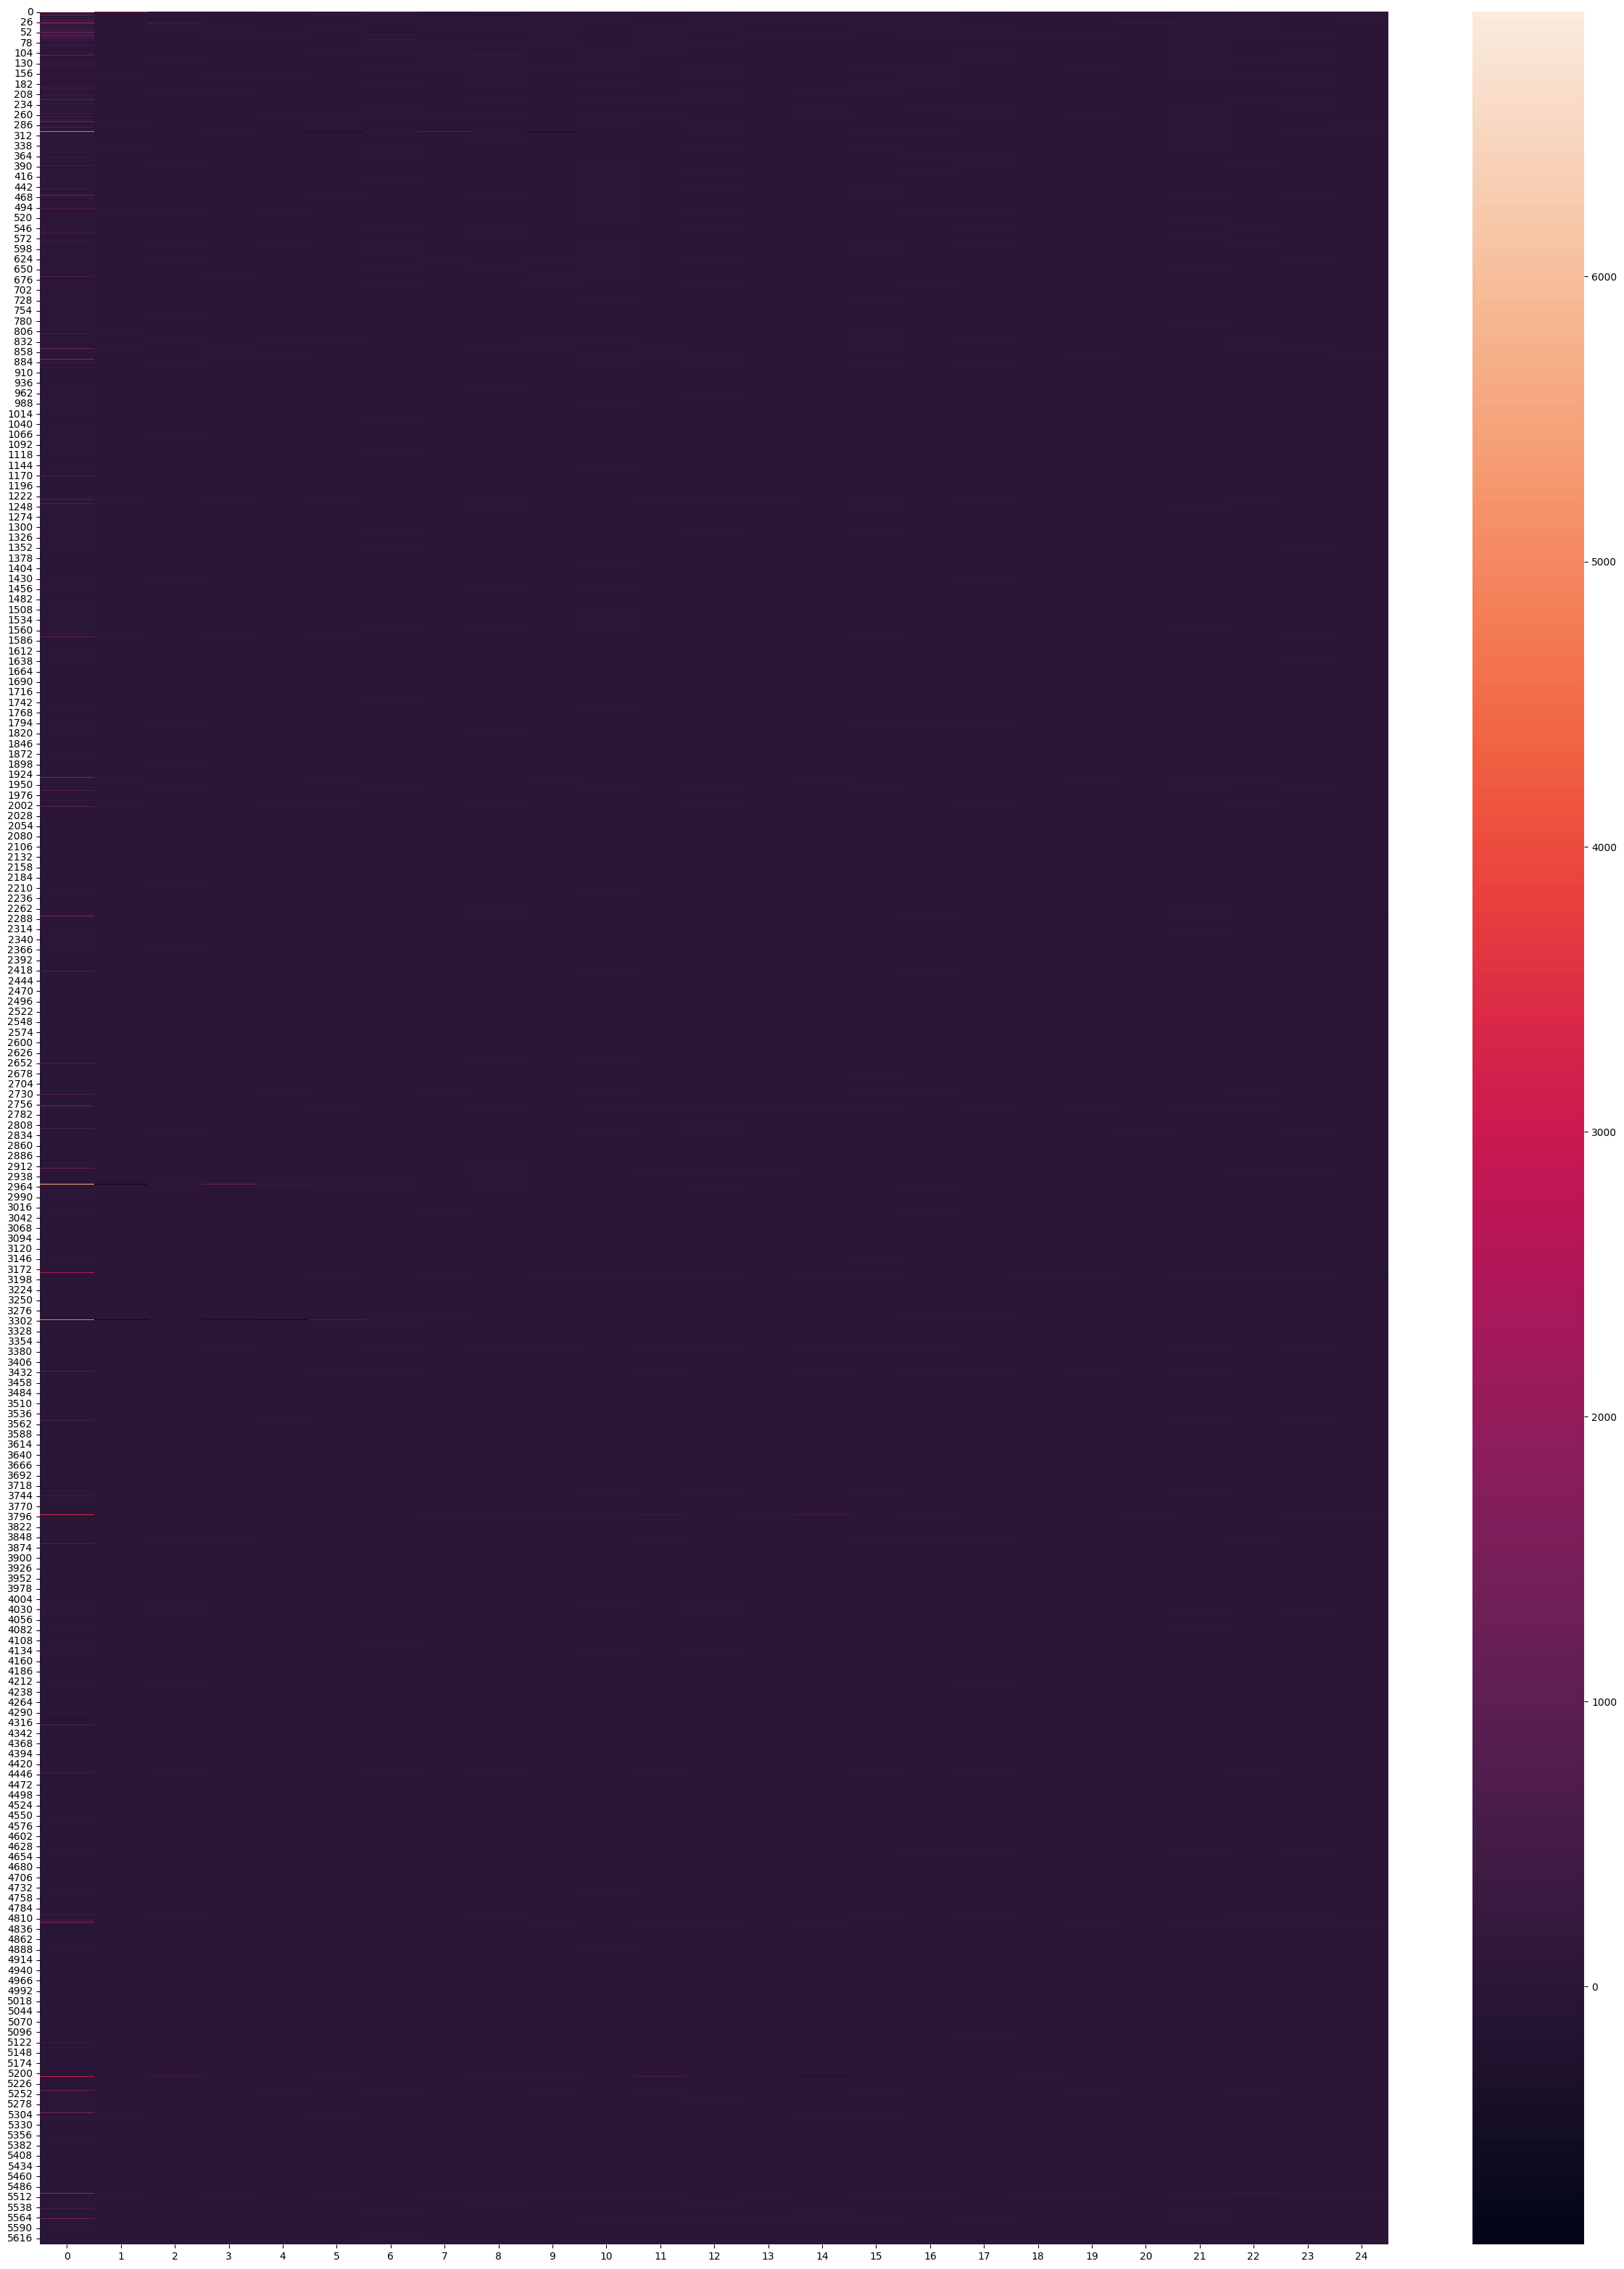

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30,40))         # Sample figsize in inches
sns.heatmap(pca.fit_transform(mainmatrix), annot=False,)


In [ ]:
# здесь можно пойти пить чай

"""c = preprocessing()
data2['petition_tokens'] = [c.exec2(data2.iloc[i, 1], stopwords2) for i in range(len(data2))]
"""

"c = preprocessing()\ndata2['petition_tokens'] = [c.exec2(data2.iloc[i, 1], stopwords2) for i in range(len(data2))]\n"

In [ ]:
"""main_arr = []
main_arr2 = []
for i in range(len(data2.iloc[:,4])):
  arr = []
  for key, value in vocab.items():
    for j in data2.iloc[i, 4]:
      if j == value:
        arr.append(key)
  main_arr.append(arr)
  main_arr2 += arr
data2['petition_vectors'] = main_arr"""

"main_arr = []\nmain_arr2 = []\nfor i in range(len(data2.iloc[:,4])):\n  arr = []\n  for key, value in vocab.items():\n    for j in data2.iloc[i, 4]:\n      if j == value:\n        arr.append(key)\n  main_arr.append(arr)\n  main_arr2 += arr\ndata2['petition_vectors'] = main_arr"

In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
class CBOW(nn.Module):
  def __init__(self, embedding_size = 100, vocab_size = -1):
    super().__init__()
    self.relu = nn.ReLU()
    self.embeddings = nn.Embedding(vocab_size, embedding_size)
    self.linear = nn.Linear(embedding_size, vocab_size)

  def forward(self, inputs):
    inputs = self.relu(inputs)
    embeddings = self.embeddings(inputs).mean(1).squeeze(1)

    return self.linear(embeddings)

In [ ]:
def prepare():
  tokenized_text = tokenized
  id2word = vocab2
  word2id = {v:k for k, v in id2word.items()}
  data = []

  for i in range(2, len(tokenized_text)-2):
    context = [
        tokenized_text[i-2],
        tokenized_text[i-1],
        tokenized_text[i+1],
        tokenized_text[i+2],

    ]
    target = tokenized_text[i]
    context_idxs = [word2id[w] for w in context]
    target_idx = word2id[target]
    data.append((context_idxs, target_idx))
  return data, word2id, id2word

In [ ]:
EMBEDDING_SIZE = 300
data, word2id, id2word = prepare()
loss_func = nn.CrossEntropyLoss()
net = CBOW(embedding_size = EMBEDDING_SIZE, vocab_size = len(word2id)+1)
optimizer = optim.Adam(net.parameters(), lr = 0.0001)

context_data = torch.tensor([x[0] for x in data])
labels = torch.tensor([x[1] for x in data])

ds = torch.utils.data.TensorDataset(context_data, labels)
dl = torch.utils.data.DataLoader(ds, batch_size = 256, shuffle = True)

In [ ]:
for epoch in range(30):
  for context, label in dl:
    output = net(context)
    loss = loss_func(output, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print("epoch: {}, Loss: {}".format(epoch, loss.item()))


epoch: 0, Loss: 8.541303634643555
epoch: 1, Loss: 8.345071792602539
epoch: 2, Loss: 8.213900566101074
epoch: 3, Loss: 7.959316730499268
epoch: 4, Loss: 7.851509094238281
epoch: 5, Loss: 7.555991172790527
epoch: 6, Loss: 7.144256114959717
epoch: 7, Loss: 7.160353183746338
epoch: 8, Loss: 7.117581844329834
epoch: 9, Loss: 6.656109809875488
epoch: 10, Loss: 6.525301456451416
epoch: 11, Loss: 6.443979740142822
epoch: 12, Loss: 6.266114234924316
epoch: 13, Loss: 5.957254886627197
epoch: 14, Loss: 6.032184600830078
epoch: 15, Loss: 5.791247367858887
epoch: 16, Loss: 5.493041515350342
epoch: 17, Loss: 5.603127479553223
epoch: 18, Loss: 5.905448913574219
epoch: 19, Loss: 5.524788856506348
epoch: 20, Loss: 5.111567974090576
epoch: 21, Loss: 5.363630771636963
epoch: 22, Loss: 5.1087422370910645
epoch: 23, Loss: 4.915272235870361
epoch: 24, Loss: 5.462624549865723
epoch: 25, Loss: 4.923581123352051
epoch: 26, Loss: 5.301230430603027
epoch: 27, Loss: 5.0790581703186035
epoch: 28, Loss: 5.041400909

In [ ]:
embed_matrix = net.embeddings.weight.detach().cpu().numpy()

In [ ]:
print(embed_matrix)

[[ 0.5915148  -0.43953186 -0.771989   ...  1.1839579   0.02593694
   0.3051619 ]
 [ 0.10908982  0.8746187   1.0415149  ...  0.09921849 -0.33248812
   1.3901162 ]
 [ 0.5746906   0.7645103  -0.98811996 ... -0.0694528   0.18437351
   0.8365304 ]
 ...
 [-1.4912733  -0.27307492 -0.9506348  ...  2.6389048  -1.4895678
  -0.9198729 ]
 [ 0.18110198 -0.20679556 -0.08852456 ... -0.5160911  -1.8939861
  -2.5743482 ]
 [ 0.04592331  0.9668551   2.1089232  ... -1.1915983   0.01187129
  -0.5160809 ]]


In [ ]:
tokens = []
for key, value in vocab.items():
  tokens.append(value)
print(tokens)


['снег', 'дорога', 'очистить', 'кабельный', 'киоск', 'реклама', 'просить', 'убрать', 'всё', 'дерево', 'кустарник', 'который', 'выйти', 'предел', 'газон', 'пешеходный', 'зона', 'начинать', 'подъезд', 'фасад', 'дом', 'сторона', 'ул', 'наличный', 'неудовлетворительный', 'состояние', 'парадный', 'надпись', 'дверь', 'этаж', 'граффити', 'необходимо', 'проверить', 'законность', 'установка', 'вывеска', 'мкд', 'адрес', 'проспект', 'непокорённый', 'случай', 'установить', 'незаконно', 'её', 'демонтировать', 'уборка', 'производиться', 'лестница', 'очень', 'грязно', 'весь', 'вплоть', 'го', 'звонок', 'жкс', 'дать', 'результат', 'мусор', 'отсутствовать', 'освещение', 'лестничный', 'площадка', 'делать', 'благоустройство', 'никто', 'убирать', 'ежедневно', 'просьба', 'закрасить', 'забор', 'тротуар', 'проблема', 'регулярный', 'вывоз', 'рисунок', 'пожалуйста', 'удалить', 'бетонный', 'обрубка', 'ржавый', 'арматура', 'улица', 'тухачевский', 'далее', 'асфальт', 'ланский', 'шоссе', 'повредить', 'почтовый', 'я

In [ ]:
arr =['xxx']
tokens = arr + tokens

In [ ]:
PATH = '\content'
torch.save(net.state_dict(), PATH)

In [ ]:
np.savetxt('embeddings.tsv', embed_matrix, delimiter='\t')

In [ ]:
torch.save(net, 'cbow.pt')

In [ ]:
np.savetxt("tokens.tsv", tokens, delimiter="\t", newline = "\n", fmt="%s")

In [ ]:
from google.colab import files
files.download("tokens.tsv")
files.download("embeddings.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

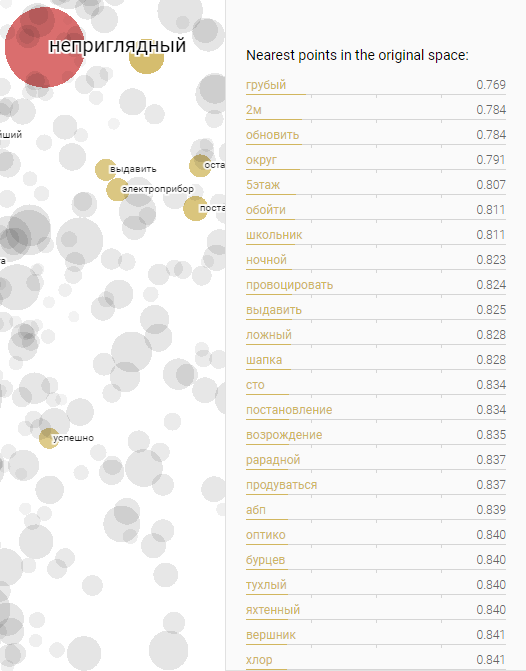

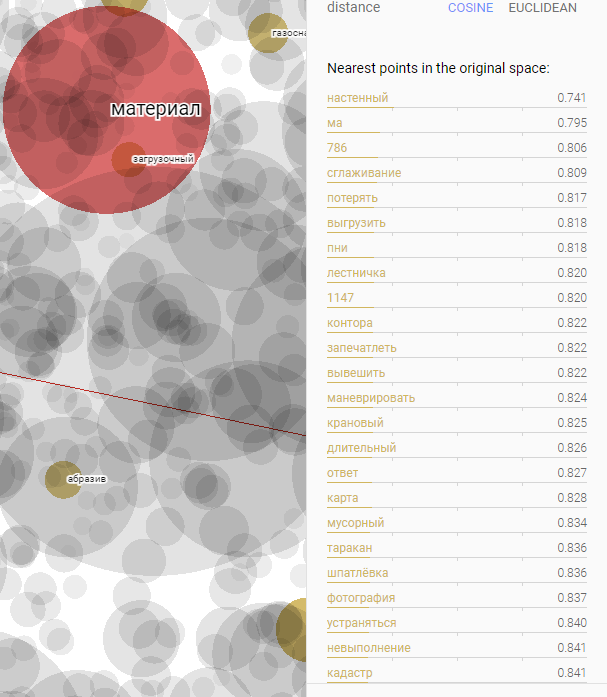